# FIT3139 Assignment 1 – Damped Harmonic Oscillator Analysis
**Author:** Harvey Houlahan  
**Date:** 26/03/2025  

This notebook presents a concise analysis of the damped harmonic oscillator model. Each section is numbered and contains a brief explanation along with the corresponding results.

## 0. Problem Selection

**Explanation:**  
For this assignment, I selected the damped harmonic oscillator function given by

$$
\theta(t) = \theta_0 \, e^{-\gamma t} \cos\left(\sqrt{\omega^2 - \gamma^2}\,t\right)
$$

This function models a damped pendulum in the underdamped regime (where $ \gamma < \omega $). The variables and constants are defined as follows:
- $ \theta(t) $ is the angular displacement at time $ t $.
- $ \theta_0 $ is the initial amplitude (i.e., the value of $ \theta(t) $ at $ t = 0 $).
- $ \gamma $ is the damping coefficient, which determines how quickly the amplitude decays over time.
- $ \omega $ is the natural angular frequency, which influences the oscillation period of the system.

I find this function genuinley intriguing as it captures both the oscillatory behavior (through cosine) and the exponential decay (through the $ e^{-\gamma t} $ term). This interplay between oscillation and damping is common in many real-world systems—such as pendulums, RLC circuits, and various mechanical systems—and offers a rich basis for studying the effects of computational and data errors.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Set up matplotlib for inline display
%matplotlib inline

# Define the exact damped oscillator function:
#   theta(t) = theta0 * exp(-gamma*t) * cos(sqrt(omega^2 - gamma^2) * t)
def theta_exact(t, theta0=1.0, gamma=0.5, omega=1.0):
    if gamma >= omega:
        raise ValueError("gamma must be less than omega for underdamped oscillations.")
    Omega = np.sqrt(omega**2 - gamma**2)
    return theta0 * np.exp(-gamma * t) * np.cos(Omega * t)

## 1. Exact Solution

**Explanation:**  
I chose the exact model
$$
\theta(t) = \theta_0 \, e^{-\gamma t} \cos\left(\sqrt{\omega^2 - \gamma^2}\,t\right)
$$
over the domain $t \in [0,15]$ seconds.

-- **Varying $\gamma$:**

With $\omega = 1.0$ fixed, increasing $\gamma$ makes the exponential decay term $e^{-\gamma t}$ drop off faster. Thus, the oscillation amplitude decays more rapidly. For low $\gamma$ (e.g., $0.1$), the oscillations persist longer, while for high $\gamma$ (e.g., $0.9$) the oscillations are quickly damped.

-- **Varying $\omega$:**

With $\gamma = 0.1$ fixed, a higher $\omega$ produces faster oscillations (shorter period) because the cosine term, $\cos\left(\sqrt{\omega^2 - \gamma^2},t\right)$, oscillates more rapidly. The decay envelope remains similar since it depends solely on $\gamma$.


Below, I show the plots for both cases.

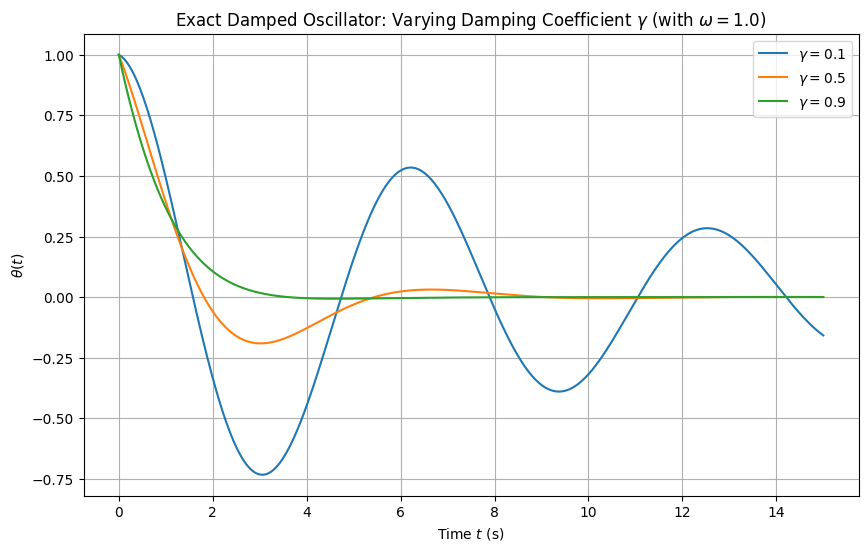

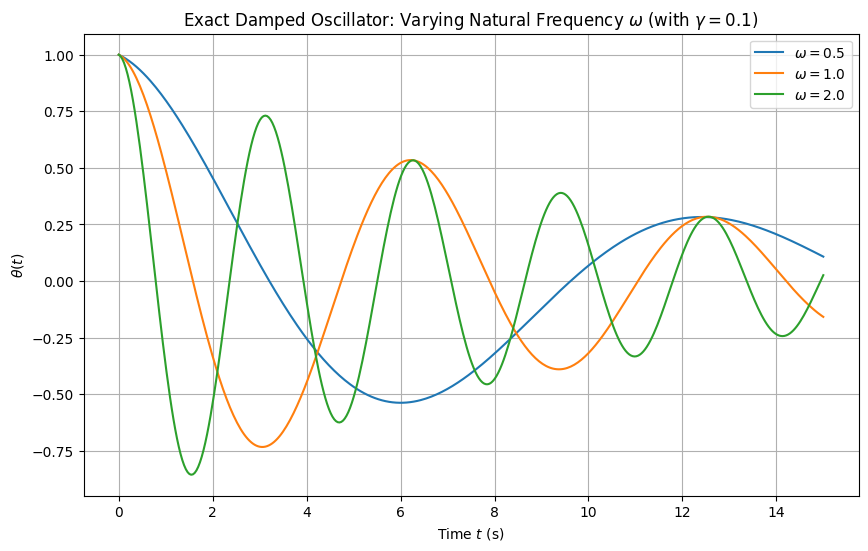

In [25]:
# Domain
t = np.linspace(0, 15, 400)

# Varying gamma (with omega fixed at 1.0 and theta0 = 1.0)
gammas = [0.1, 0.5, 0.9]
plt.figure(figsize=(10,6))
for gamma in gammas:
    plt.plot(t, theta_exact(t, theta0=1.0, gamma=gamma, omega=1.0), label=f"$\\gamma = {gamma}$")
plt.title("Exact Damped Oscillator: Varying Damping Coefficient $\\gamma$ (with $\\omega=1.0$)")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta(t)$")
plt.legend()
plt.grid(True)
plt.show()

# Varying omega (with gamma fixed at 0.1)
omegas = [0.5, 1.0, 2.0]
plt.figure(figsize=(10,6))
for omega in omegas:
    plt.plot(t, theta_exact(t, theta0=1.0, gamma=0.1, omega=omega), label=f"$\\omega = {omega}$")
plt.title("Exact Damped Oscillator: Varying Natural Frequency $\\omega$ (with $\\gamma=0.1$)")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta(t)$")
plt.legend()
plt.grid(True)
plt.show()

## 2. Modeling Errors

**Explanation:**  
We approximate the exact model using a truncated Taylor series expansion about \( t = 0 \).

The Taylor expansions are:
- $e^{-\gamma t} \approx 1 - \gamma t$
- $\cos\left(\sqrt{\omega^2 - \gamma^2}\,t\right) \approx 1$ (since the first nonzero term beyond 1 is of order $t^2$).

Thus, the truncated approximation is:
$$
\theta_{\text{approx}}(t) \approx \theta_0 (1 - \gamma t)
$$

This linear model accurately reflects the initial value and slope at $t = 0$ but loses the curvature and oscillatory behavior. Consequently, while it may match the exact function for very small $t$, it deviates significantly as $t$ increases.

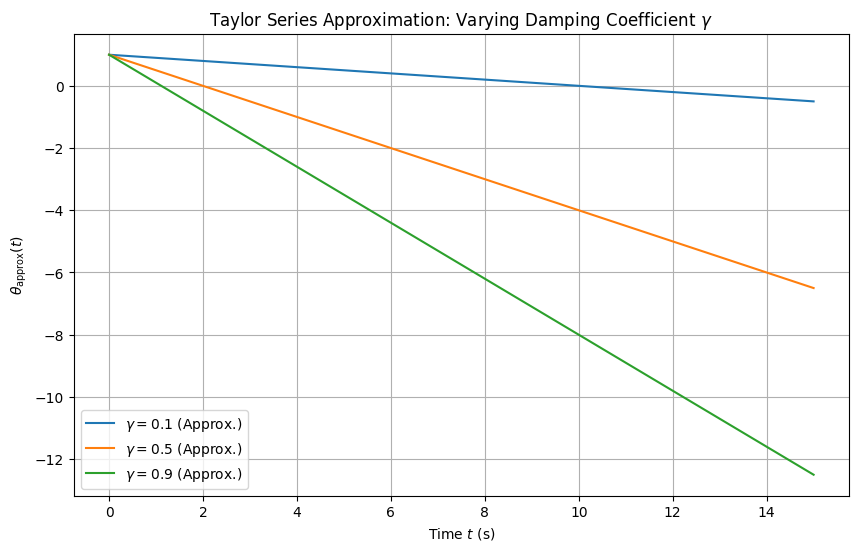

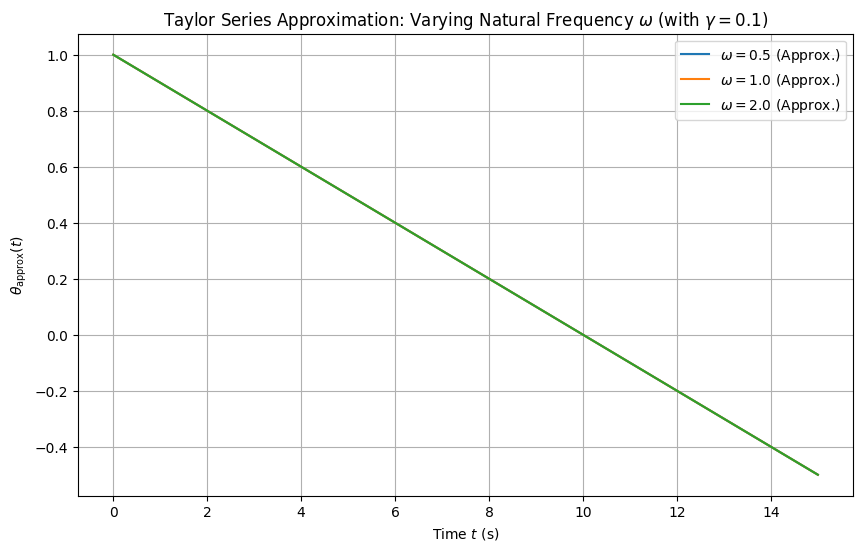

In [26]:
def theta_approx(t, theta0=1.0, gamma=0.5):
    return theta0 * (1 - gamma * t)

# Plotting the Taylor approximation for varying gamma.
plt.figure(figsize=(10,6))
for gamma in gammas:
    plt.plot(t, theta_approx(t, theta0=1.0, gamma=gamma), label=f"$\\gamma = {gamma}$ (Approx.)")
plt.title("Taylor Series Approximation: Varying Damping Coefficient $\\gamma$")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta_{\\text{approx}}(t)$")
plt.legend()
plt.grid(True)
plt.show()

# Note: The approximation does not depend on omega.
plt.figure(figsize=(10,6))
for omega in omegas:
    plt.plot(t, theta_approx(t, theta0=1.0, gamma=0.1), label=f"$\\omega = {omega}$ (Approx.)")
plt.title("Taylor Series Approximation: Varying Natural Frequency $\\omega$ (with $\\gamma=0.1$)")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta_{\\text{approx}}(t)$")
plt.legend()
plt.grid(True)
plt.show()

## 3. Data Errors
**Explanation:**  
I simulate limited numerical precision by chopping all computed values to 3 decimal places.  
This process introduces small round-off errors, but the overall behavior—oscillations and decay—is preserved.  
The following plots compare the exact solution computed with full precision and with 3-decimal chopping.  
Small differences may occur when the output values are very close to zero.

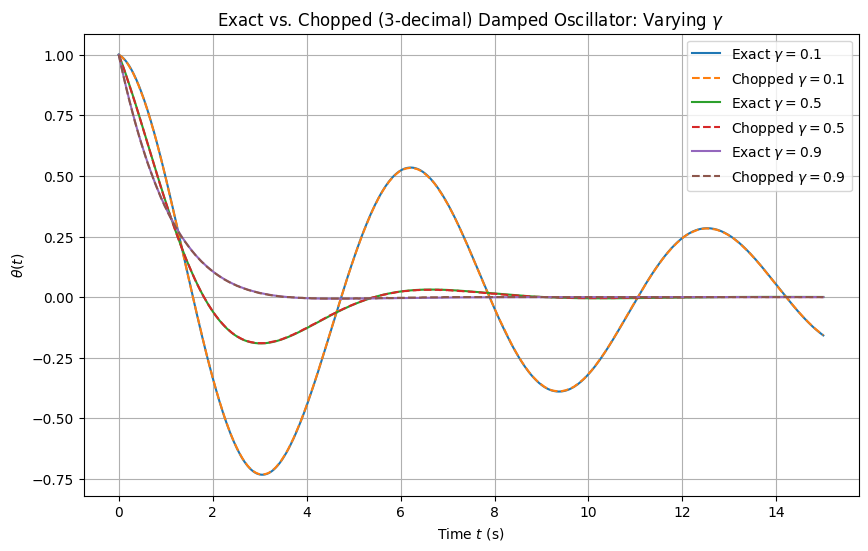

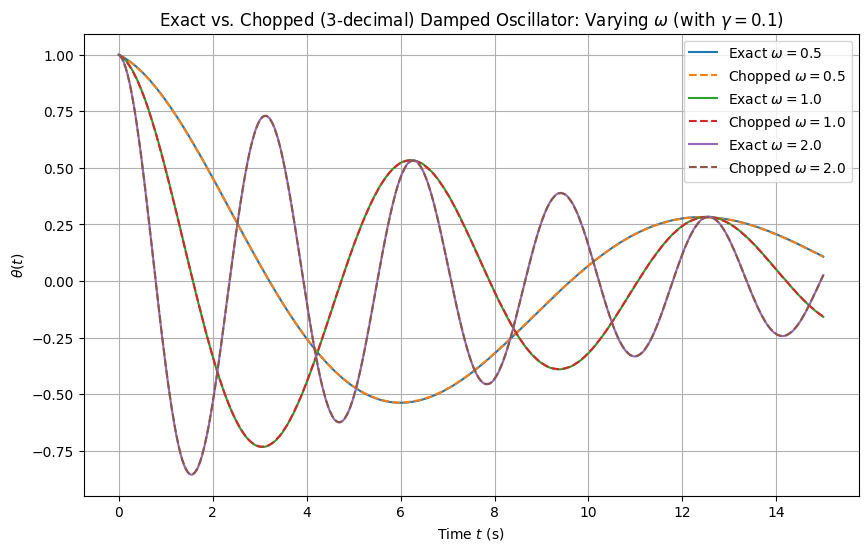

In [27]:
def chop_to_3(x):
    return np.trunc(x * 1000) / 1000

def theta_exact_chopped(t, theta0=1.0, gamma=0.5, omega=1.0):
    if gamma >= omega:
        raise ValueError("gamma must be less than omega for underdamped oscillations.")
    Omega = np.sqrt(omega**2 - gamma**2)
    exp_term = chop_to_3(np.exp(-gamma * t))
    cos_term = chop_to_3(np.cos(Omega * t))
    result = chop_to_3(theta0 * exp_term * cos_term)
    return result

# Compare exact and chopped results for varying gamma.
plt.figure(figsize=(10,6))
for gamma in gammas:
    plt.plot(t, theta_exact(t, theta0=1.0, gamma=gamma, omega=1.0), label=f"Exact $\\gamma = {gamma}$")
    plt.plot(t, theta_exact_chopped(t, theta0=1.0, gamma=gamma, omega=1.0), '--', label=f"Chopped $\\gamma = {gamma}$")
plt.title("Exact vs. Chopped (3-decimal) Damped Oscillator: Varying $\\gamma$")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta(t)$")
plt.legend()
plt.grid(True)
plt.show()

# Compare for varying omega (with gamma=0.1).
plt.figure(figsize=(10,6))
for omega in omegas:
    plt.plot(t, theta_exact(t, theta0=1.0, gamma=0.1, omega=omega), label=f"Exact $\\omega = {omega}$")
    plt.plot(t, theta_exact_chopped(t, theta0=1.0, gamma=0.1, omega=omega), '--', label=f"Chopped $\\omega = {omega}$")
plt.title("Exact vs. Chopped (3-decimal) Damped Oscillator: Varying $\\omega$ (with $\\gamma=0.1$)")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta(t)$")
plt.legend()
plt.grid(True)
plt.show()

## 4. Total Error
**Explanation:**  
This section combines both modeling errors (the Taylor approximation) and data errors (3-decimal chopping).  
I compare the exact solution with the combined approximation, showing that while the approximation matches well near $t = 0$, it diverges significantly for larger $t$ (especially after the function crosses zero).  
The total error is dominated by the modeling error.

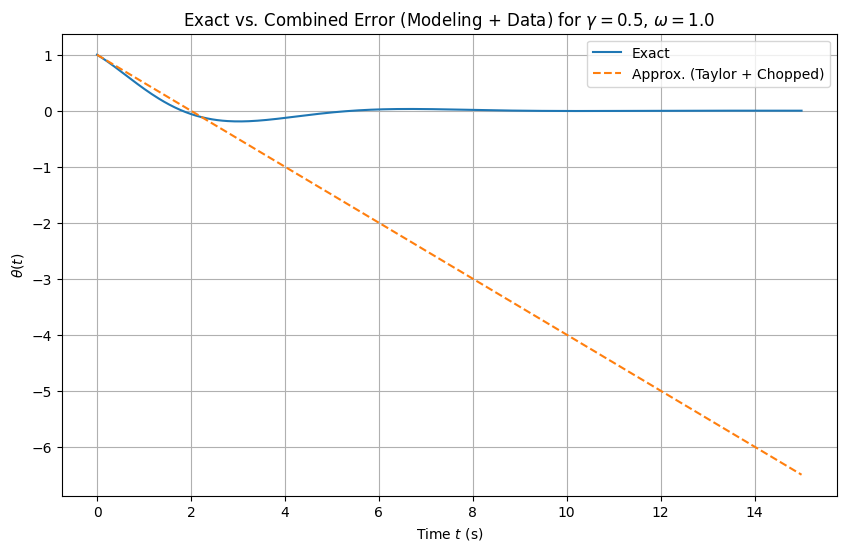

In [28]:
def theta_approx_chopped(t, theta0=1.0, gamma=0.5):
    return chop_to_3(theta0 * (1 - gamma * t))

# Representative case: gamma=0.5, omega=1.0.
plt.figure(figsize=(10,6))
plt.plot(t, theta_exact(t, theta0=1.0, gamma=0.5, omega=1.0), label="Exact")
plt.plot(t, theta_approx_chopped(t, theta0=1.0, gamma=0.5), '--', label="Approx. (Taylor + Chopped)")
plt.title("Exact vs. Combined Error (Modeling + Data) for $\\gamma=0.5$, $\\omega=1.0$")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta(t)$")
plt.legend()
plt.grid(True)
plt.show()

## 5. Sensitivity and Conditioning

**Explanation:**  
I evaluted the sensitivity of the model by computing its condition number, which can be approximated by
$$
CN(\theta(t)) \approx \left|\frac{t \, \theta'(t)}{\theta(t)}\right|
$$
For the exact function, the condition number spikes near the zero crossings of $\theta(t)$ (when $\theta(t)$ approaches 0), indicating that the output is extremely sensitive to small changes in $t$ in those regions. The Taylor approximation yields a different condition profile, with a singularity when $1 - \gamma t = 0$. This analysis helps identify the regions where the model’s output is reliable (low condition number) and where it is highly sensitive (high condition number).

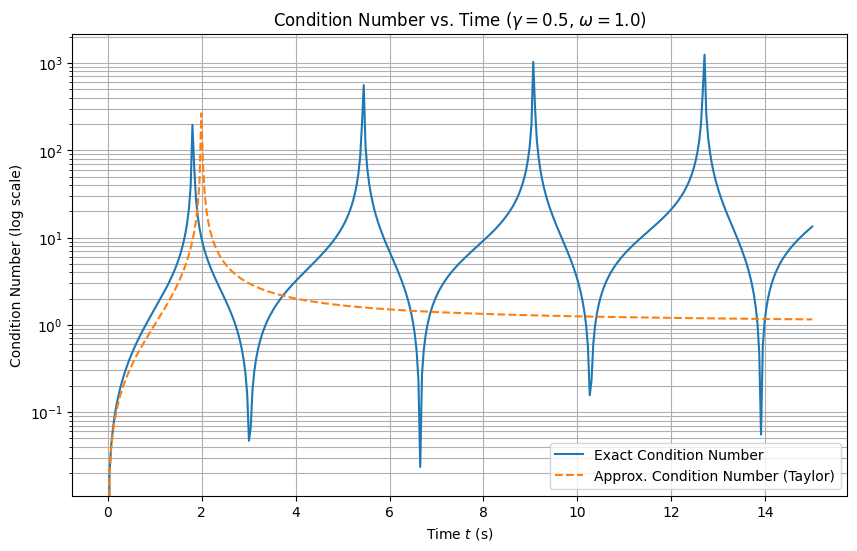

In [29]:
def theta_exact_derivative(t, theta0=1.0, gamma=0.5, omega=1.0):
    if gamma >= omega:
        raise ValueError("gamma must be less than omega for underdamped oscillations.")
    Omega = np.sqrt(omega**2 - gamma**2)
    term1 = -gamma * np.exp(-gamma * t) * np.cos(Omega * t)
    term2 = -Omega * np.exp(-gamma * t) * np.sin(Omega * t)
    return theta0 * (term1 + term2)

def condition_number_exact(t, theta0=1.0, gamma=0.5, omega=1.0):
    theta_val = theta_exact(t, theta0, gamma, omega)
    theta_prime = theta_exact_derivative(t, theta0, gamma, omega)
    cn = np.abs(t * theta_prime / theta_val)
    cn[theta_val == 0] = np.inf
    return cn

def condition_number_approx(t, theta0=1.0, gamma=0.5):
    theta_approx_val = theta_approx(t, theta0, gamma)
    cn = np.abs(gamma * t / theta_approx_val)
    cn[theta_approx_val == 0] = np.inf
    return cn

cn_exact = condition_number_exact(t, theta0=1.0, gamma=0.5, omega=1.0)
cn_approx = condition_number_approx(t, theta0=1.0, gamma=0.5)

plt.figure(figsize=(10,6))
plt.plot(t, cn_exact, label="Exact Condition Number")
plt.plot(t, cn_approx, '--', label="Approx. Condition Number (Taylor)")
plt.yscale("log")
plt.title("Condition Number vs. Time ($\\gamma=0.5$, $\\omega=1.0$)")
plt.xlabel("Time $t$ (s)")
plt.ylabel("Condition Number (log scale)")
plt.legend()
plt.grid(True, which="both")
plt.show()

**AI Acknowledgment:**  
I used ChatGPT to help structure and refine the wording of my explanations, particularly to enhance the mathematical clarity and rigor of the derivations. I engaged in approximately 2–3 iterations with the tool, using it solely for language refinement while all mathematical content was verified and adjusted by me. More details on acknowledging AI use can be found [here](https://www.monash.edu/student-academic-success/build-digital-capabilities/create-online/acknowledging-the-use-of-generative-artificial-intelligence).